In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
from sklearn.datasets import load_breast_cancer
df=load_breast_cancer()
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names

In [36]:
x=dataset
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
y=pd.DataFrame(df['target'],columns=["Target"])
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [40]:
y.shape

(569, 1)

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.20,random_state=42)

In [44]:
x_train.shape


(455, 30)

In [46]:
x_test.shape

(114, 30)

In [47]:
#standarixing the datadet
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [51]:
x_train=scaler.fit_transform(x_train)
x_train.shape

(455, 30)

In [49]:
x_test=scaler.transform(x_test)

In [52]:
#1st method(np.sqrt())
np.sqrt(x_train.shape[0])

21.330729007701542

In [53]:
k=17
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [54]:
#train model
knn.fit(x_train,y_train)

C:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=17)

In [56]:
ypred=knn.predict(x_test)
ypred.shape

(114,)

In [57]:
y_test.shape

(114, 1)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.9473684210526315

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred)

array([[39,  4],
       [ 2, 69]], dtype=int64)

In [61]:
## 2 method
acc=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    acc.append(accuracy_score(y_test,knn.predict(x_test)))

C:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: 

In [64]:
acc

[0.9385964912280702,
 0.9385964912280702,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9649122807017544,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315]

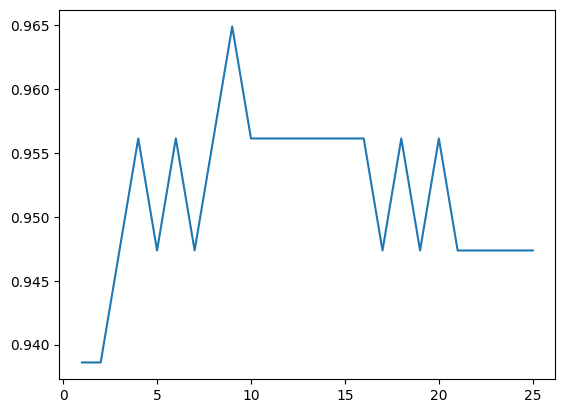

In [65]:
plt.plot(range(1,26),acc)

In [81]:
knn=KNeighborsClassifier(n_neighbors=9,algorithm='brute',weights='distance')
knn.fit(x_train,y_train)

C:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='brute', n_neighbors=9, weights='distance')

In [82]:
ypr=knn.predict(x_test)
accuracy_score(y_test,ypr)

0.9649122807017544

 ### DECISION TREE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
x=iris.data
y=iris.target

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
classifier=DecisionTreeClassifier(splitter='random',)

In [18]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(splitter='random')

In [19]:
ypre=classifier.predict(X_test)

In [20]:
from sklearn.metrics import r2_score,accuracy_score
print(r2_score(y_test,ypre))

0.839572192513369


In [21]:
print(accuracy_score(y_test,ypre))

0.9


[Text(0.30952380952380953, 0.9375, 'x[0] <= 5.203\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(0.09523809523809523, 0.8125, 'x[3] <= 0.771\ngini = 0.202\nsamples = 36\nvalue = [32, 3, 1]'),
 Text(0.047619047619047616, 0.6875, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(0.14285714285714285, 0.6875, 'x[3] <= 1.668\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.09523809523809523, 0.5625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.19047619047619047, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5238095238095238, 0.8125, 'x[3] <= 1.418\ngini = 0.598\nsamples = 84\nvalue = [10, 36, 38]'),
 Text(0.3333333333333333, 0.6875, 'x[3] <= 0.353\ngini = 0.463\nsamples = 33\nvalue = [10, 22, 1]'),
 Text(0.2857142857142857, 0.5625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.38095238095238093, 0.5625, 'x[3] <= 0.512\ngini = 0.313\nsamples = 27\nvalue = [4, 22, 1]'),
 Text(0.3333333333333333, 0.4375, 'gini = 0.0\nsamples = 4\nva

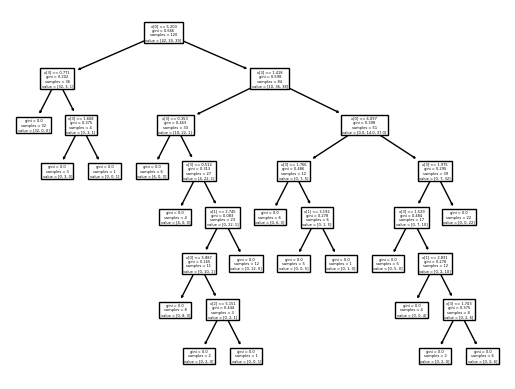

In [22]:
from sklearn import tree
tree.plot_tree(classifier)